In [1]:
import pandas as pd
import numpy as np

In [11]:
# Load the dataset with the appropriate encoding
file_path = r"C:\Users\user\Desktop\portfolio file\Sample - Superstore.csv"
data = pd.read_csv(file_path, encoding='latin1')  # 'latin1' often works for such cases

# Display the first few rows of the dataset to inspect it
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

In [13]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [15]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

# Confirm removal of duplicates
print("Number of rows after removing duplicates:", len(data))

Number of duplicate rows: 0
Number of rows after removing duplicates: 9994


In [17]:
# Convert 'Order Date' and 'Ship Date' columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Confirm the conversion
print("Data types after conversion:")
print(data.dtypes)

Data types after conversion:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [19]:
# Add 'Order Month' column
data['Order Month'] = data['Order Date'].dt.month

# Add 'Delivery Duration' column
data['Delivery Duration'] = (data['Ship Date'] - data['Order Date']).dt.days

# Display the first few rows to confirm the new columns
print(data[['Order Date', 'Ship Date', 'Order Month', 'Delivery Duration']].head())


  Order Date  Ship Date  Order Month  Delivery Duration
0 2016-11-08 2016-11-11           11                  3
1 2016-11-08 2016-11-11           11                  3
2 2016-06-12 2016-06-16            6                  4
3 2015-10-11 2015-10-18           10                  7
4 2015-10-11 2015-10-18           10                  7


In [21]:
# Generate descriptive statistics
print("Descriptive statistics for numerical columns:")
print(data.describe())

Descriptive statistics for numerical columns:
            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.

C:\Users\user\AppData\Local\Temp\ipykernel_7508\2289757798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


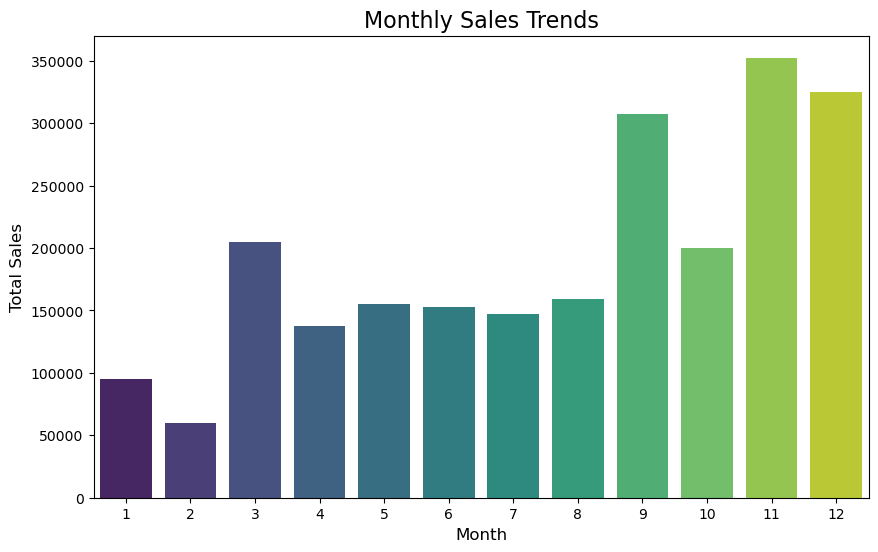

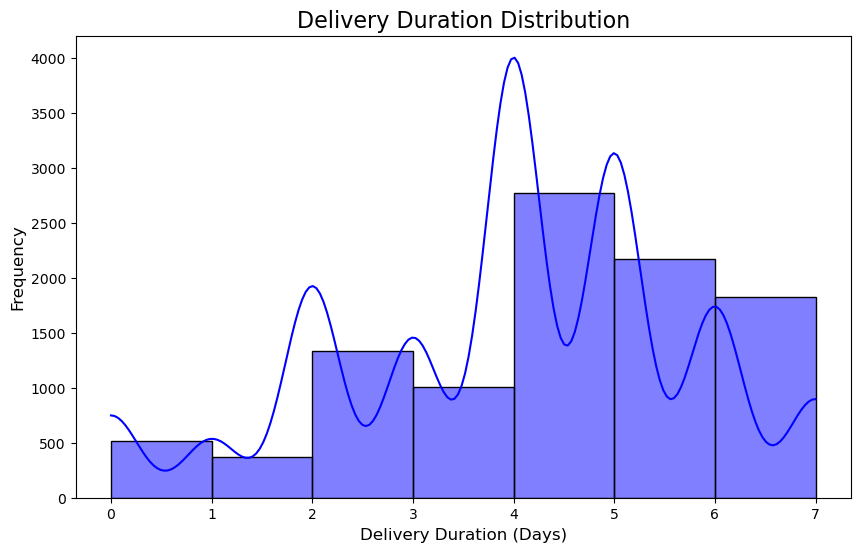

C:\Users\user\AppData\Local\Temp\ipykernel_7508\2289757798.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="rocket")


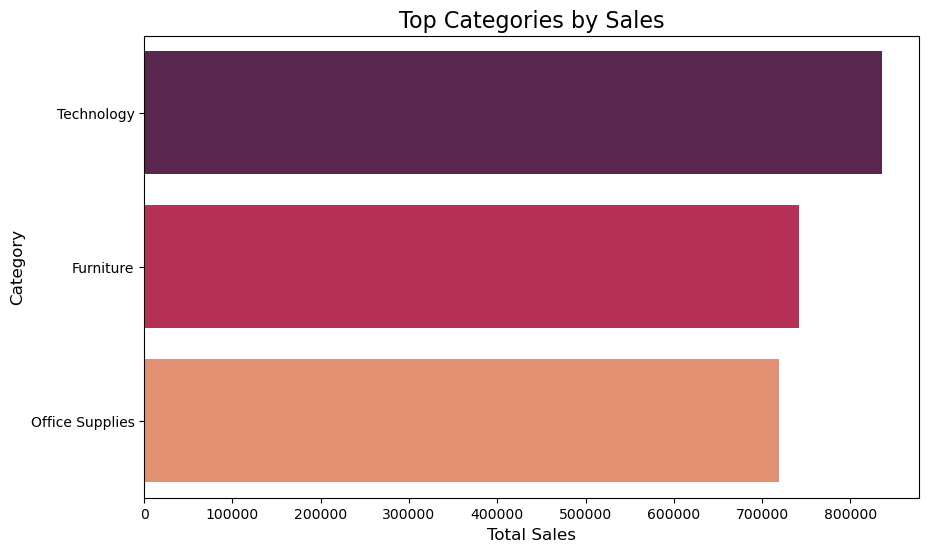

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly sales trends
monthly_sales = data.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

# Delivery duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery Duration'], bins=7, kde=True, color='blue')
plt.title('Delivery Duration Distribution', fontsize=16)
plt.xlabel('Delivery Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Top categories by sales
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="rocket")
plt.title('Top Categories by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


Total Sales by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


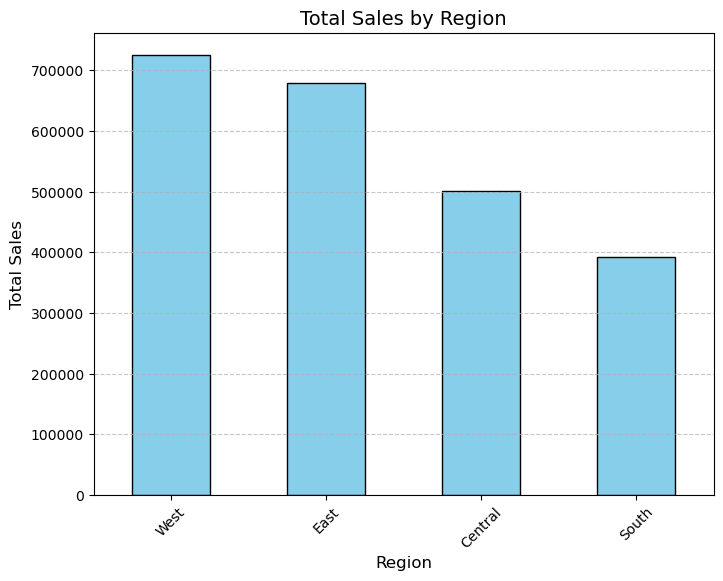

In [27]:
# Grouping sales by region
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Displaying region-wise sales
print("Total Sales by Region:")
print(region_sales)

# Visualizing sales by region
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Total Profit by Category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


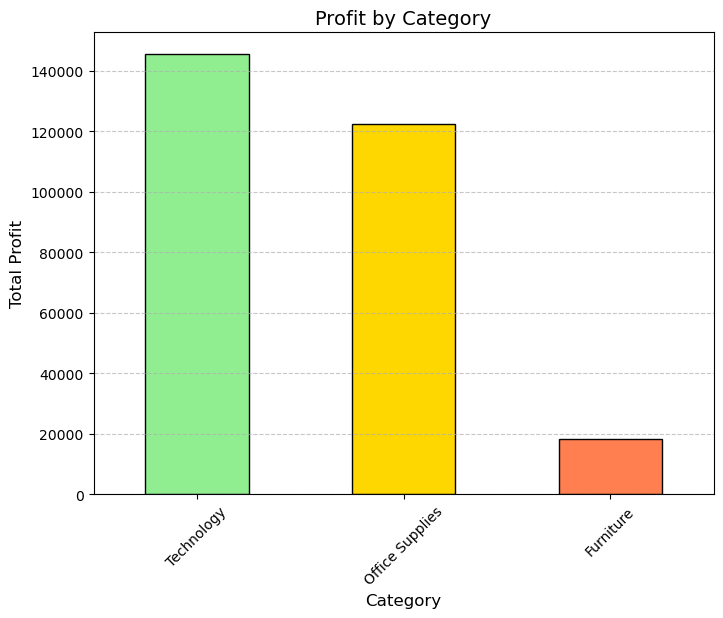

In [29]:
# Grouping profit by category
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Displaying category-wise profitability
print("Total Profit by Category:")
print(category_profit)

# Visualizing profit by category
plt.figure(figsize=(8, 6))
category_profit.plot(kind='bar', color=['lightgreen', 'gold', 'coral'], edgecolor='black')
plt.title('Profit by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Sales and Profit by Category:
                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


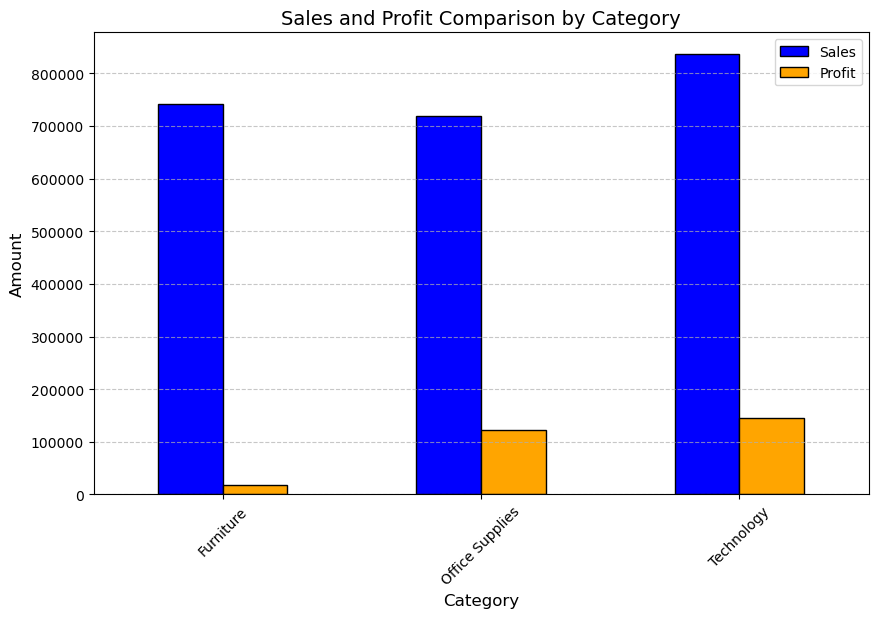

In [31]:
# Grouping sales and profit by category
category_sales_profit = data.groupby('Category')[['Sales', 'Profit']].sum()

# Displaying sales and profit comparison by category
print("Sales and Profit by Category:")
print(category_sales_profit)

# Plotting sales and profit comparison by category
category_sales_profit.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'], edgecolor='black')
plt.title('Sales and Profit Comparison by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [35]:
# Preparing the data for forecasting
data_forecast = data[['Order Month', 'Sales']].groupby('Order Month').sum().reset_index()

# Splitting the data into features and target
X = data_forecast[['Order Month']]  # Features: Order Month
y = data_forecast['Sales']         # Target: Sales

# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Importing the necessary model
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3028645665.157564
R-squared: 0.728992863439804


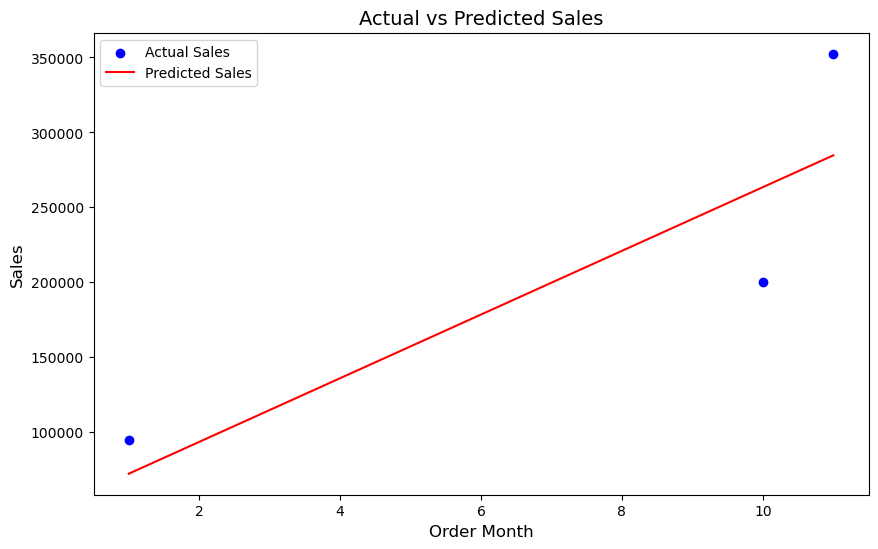

In [39]:
# Plotting the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.show()

In [41]:
pip install plotly dash


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.8 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.0/7.8 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/7.8 MB 297.7 kB/s eta 0:00:26
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/7.8 MB 328.6 kB/s eta 0:

In [50]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

file_path = r"C:\Users\user\Desktop\portfolio file\Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='latin1')  # 'latin1' often works for such cases

# Total Sales
total_sales = df['Sales'].sum()

# Total Profit
total_profit = df['Profit'].sum()

# Top Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Monthly Sales Trends
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()

# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Delivery Duration Distribution
delivery_duration = df['Delivery Duration'].value_counts().reset_index()
delivery_duration.columns = ['Duration', 'Frequency']

# Create the Dash app
app = dash.Dash(__name__)

# Create the dashboard layout
app.layout = html.Div([
    html.H1("Superstore Sales Dashboard"),
    
    # Total Sales and Profit
    html.Div([
        html.Div([
            html.H4("Total Sales"),
            html.P(f"${total_sales:,.2f}"),
        ], style={'display': 'inline-block', 'width': '45%', 'padding': '10px', 'border': '1px solid #ddd'}),
        
        html.Div([
            html.H4("Total Profit"),
            html.P(f"${total_profit:,.2f}"),
        ], style={'display': 'inline-block', 'width': '45%', 'padding': '10px', 'border': '1px solid #ddd'}),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),

    # Top Categories by Sales
    html.Div([
        dcc.Graph(
            figure=px.bar(top_categories, x='Category', y='Sales', title="Top Categories by Sales")
        ),
    ], style={'padding': '20px'}),

    # Monthly Sales Trends
    html.Div([
        dcc.Graph(
            figure=px.line(monthly_sales, x='Order Month', y='Sales', title="Monthly Sales Trends")
        ),
    ], style={'padding': '20px'}),

    # Sales by Region
    html.Div([
        dcc.Graph(
            figure=px.bar(sales_by_region, x='Region', y='Sales', title="Sales by Region")
        ),
    ], style={'padding': '20px'}),

    # Delivery Duration Distribution
    html.Div([
        dcc.Graph(
            figure=px.bar(delivery_duration, x='Duration', y='Frequency', title="Delivery Duration Distribution")
        ),
    ], style={'padding': '20px'}),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


KeyError: 'Delivery Duration'